Hierarchical and K-Means Clustering

In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.cluster import KMeans
iris_dataset = datasets.load_iris()

In [14]:
X_train, X_test,y_train,y_test= train_test_split(iris_dataset.data,iris_dataset.target, test_size = 0.20, random_state = 179)


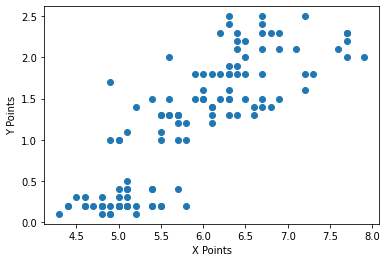

In [15]:

%matplotlib inline
plt.scatter(X_train[:, 0], X_train[:, -1])
plt.xlabel('X Points')
plt.ylabel('Y Points')
plt.show()

In [16]:

kmeans = KMeans(n_clusters=3, random_state=179).fit(X_train)
kmeans.cluster_centers_

array([[5.        , 3.4425    , 1.46      , 0.2375    ],
       [6.871875  , 3.103125  , 5.803125  , 2.103125  ],
       [5.89166667, 2.72916667, 4.34791667, 1.40208333]])

In [17]:
kmeans.labels_

array([0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0,
       0, 1, 2, 0, 2, 2, 1, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 1, 2,
       1, 1, 0, 2, 1, 0, 0, 0, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 0, 2,
       0, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2,
       1, 2, 0, 2, 0, 0, 0, 1, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 1, 2, 0, 0, 1])

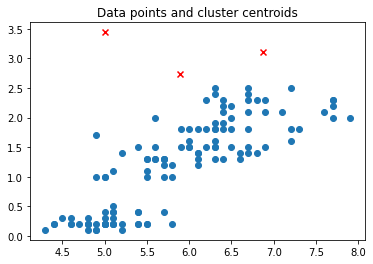

In [18]:
plt.scatter(X_train[:, 0], X_train[:, -1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],c='red', marker='x')
plt.title('Data points and cluster centroids')
plt.show()

In [19]:
#Get Silhouette Score
print(silhouette_score(X_train, kmeans.labels_))


0.5699678692404511


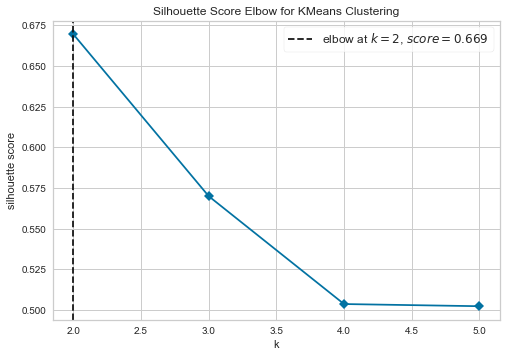

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [21]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=179)
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette',timings=False)
visualizer.fit(X_train)
visualizer.poof()

In [22]:
iris_dataset = datasets.load_iris()
X_train, X_test,y_train,y_test= train_test_split(iris_dataset.data,iris_dataset.target, test_size = 0.20, random_state = 179)


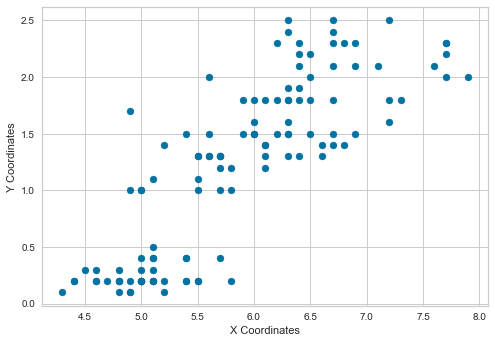

In [23]:
plt.scatter(X_train[:, 0], X_train[:, -1])
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()

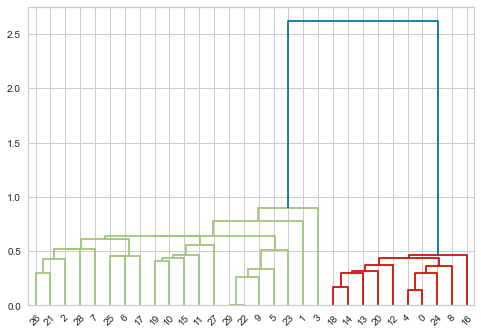

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
dendrogram(linkage(X_test, 'single'),orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering
hc_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
hc_model.fit_predict(X_test)

array([1, 0, 2, 0, 1, 0, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 2,
       0, 0, 1, 2, 2, 2, 2, 0], dtype=int64)

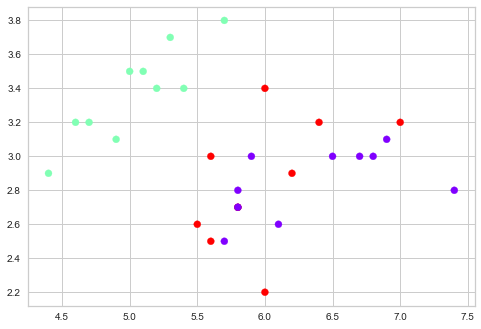

In [26]:
plt.scatter(x=X_test[:,0], y=X_test[:,1], c= hc_model.labels_, cmap='rainbow' )